In [1]:
#Import dependencies 
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#Read the data
data = pd.read_csv('movies_metabase_clean.csv')

In [3]:
#showcasing staticts of the data
data.describe()

,id,revenue,budget,popularity,runtime,spoken_languages,vote_average,vote_count
count,7397.000000,7.397000e+03,7.397000e+03,7397.000000,7391.000000,7397.000000,7397.000000,7397.000000
mean,66978.832770,6.886594e+07,2.260451e+07,8.516839,107.719659,1.446803,6.218224,559.914830
std,98989.419782,1.465125e+08,3.695024e+07,12.166210,21.480504,0.893634,1.025649,1106.682445
min,5.000000,1.000000e+00,0.000000e+00,0.000001,0.000000,0.000000,0.000000,0.000000
25%,9602.000000,2.401510e+06,0.000000e+00,3.933132,94.000000,1.000000,5.700000,41.000000
50%,19158.000000,1.683891e+07,7.500000e+06,7.436001,104.000000,1.000000,6.300000,161.000000
75%,71825.000000,6.731283e+07,2.800000e+07,10.921430,118.000000,2.000000,6.900000,542.000000
max,443319.000000,2.787965e+09,3.800000e+08,547.488298,338.000000,9.000000,10.000000,14075.000000


In [4]:
#Defining the variables X and Y
x = pd.DataFrame(data, columns=['budget'])
y = pd.DataFrame(data, columns=['revenue'])

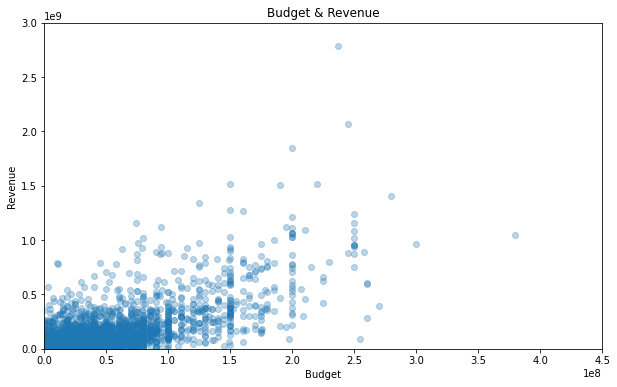

In [5]:
# Graphing the scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x,y, alpha=0.3)
plt.title("Budget & Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.show()

In [6]:
regression = LinearRegression()
regression.fit(x,y)


LinearRegression()

In [7]:
# Finding the coefficant
regression.coef_

array([[2.9521137]])

In [8]:
# find the Interception
regression.intercept_

array([2134842.34688803])

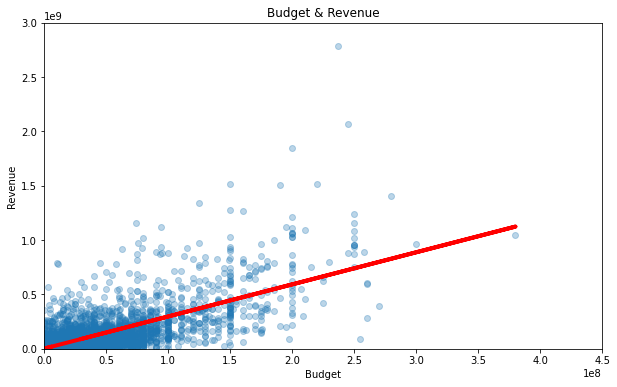

In [12]:
#plotting the Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(x,y, alpha=0.3)
plt.plot(x, regression.predict(x), color="red", linewidth=4)
plt.title("Budget & Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.show()

In [10]:
#Finding the regression score
regression.score(x,y)

0.5543081635311272